<a href="https://colab.research.google.com/github/chauqui222/du-doan-calo_o/blob/main/Nhan_dien_benh_cay_ca_chua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt


In [ ]:
#Set all the Constants
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [ ]:
folder ="/content/drive/MyDrive/Colab Notebooks/Dataset1000/"
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    folder,
    seed = 123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE)

Found 10000 files belonging to 10 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Bacterial_spot',
 'Early_blight',
 'Late_blight',
 'Leaf_Mold',
 'Septoria_leaf_spot',
 'Spider_mites Two-spotted_spider_mite',
 'Target_Spot',
 'Yellow_Leaf_Curl_Virus',
 'healthy',
 'mosaic_virus']

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[5 0 0 2 3 6 6 4 6 4 0 3 4 0 1 5 7 5 2 8 3 6 8 3 2 4 0 7 8 6 1 5]


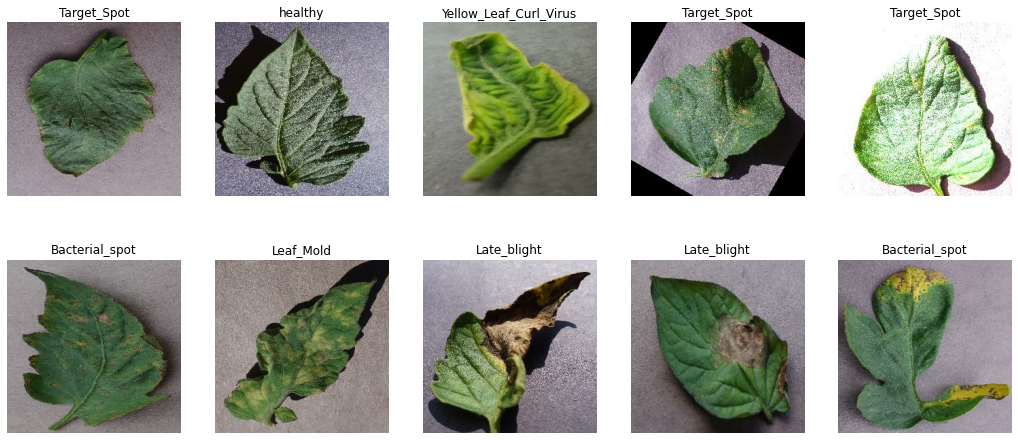

In [ ]:
#!Visualize some of the images from our dataset
plt.figure(figsize=(18, 8))
for image_batch, labels_batch in dataset.take(1):
    for i in range(10):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
def get_dataset_partitions_tf(data, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    assert (train_split + test_split + val_split) == 1
    
    data_size = len(data)
    
    if shuffle:
        data = data.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * data_size)
    val_size = int(val_split * data_size)
    
    train_data = data.take(train_size)    
    val_data = data.skip(train_size).take(val_size)
    test_data = data.skip(train_size).skip(val_size)
    
    return train_data, val_data, test_data

In [ ]:
train_data, val_data, test_data = get_dataset_partitions_tf(dataset)

In [ ]:
train_data = train_data.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = val_data.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
# Tang cuong du lieu
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
train_data = train_data.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10


In [ ]:
model = models.Sequential()
model.add(resize_and_rescale)
model.add(Conv2D(32,(3,3), activation= 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape= input_shape))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation= 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation= 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation= 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation= 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation= 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation= 'relu', kernel_initializer= 'he_uniform'))
model.add(Dropout(0.25))
model.add(Dense(n_classes, activation= 'softmax'))

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 256, 256, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 128, 128, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 128, 128, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 64, 64, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 64, 64, 64)         

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_data,
    batch_size=BATCH_SIZE,
    validation_data=val_data,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/50
250/250 [==============================] - 66s 146ms/step - loss: 1.7168 - accuracy: 0.3908 - val_loss: 0.9372 - val_accuracy: 0.6956
Epoch 2/50
250/250 [==============================] - 51s 134ms/step - loss: 0.9758 - accuracy: 0.6601 - val_loss: 0.6397 - val_accuracy: 0.7702
Epoch 3/50
250/250 [==============================] - 49s 133ms/step - loss: 0.6912 - accuracy: 0.7604 - val_loss: 0.5045 - val_accuracy: 0.8248
Epoch 4/50
250/250 [==============================] - 49s 131ms/step - loss: 0.5494 - accuracy: 0.8145 - val_loss: 0.3620 - val_accuracy: 0.8637
Epoch 5/50
250/250 [==============================] - 50s 132ms/step - loss: 0.4548 - accuracy: 0.8411 - val_loss: 0.2721 - val_accuracy: 0.9183
Epoch 6/50
250/250 [==============================] - 49s 131ms/step - loss: 0.3912 - accuracy: 0.8652 - val_loss: 0.1715 - val_accuracy: 0.9476
Epoch 7/50
250/250 [==============================] - 49s 131ms/step - loss: 0.3241 - accuracy: 0.8883 - val_loss: 0.2635 - val_ac

In [ ]:
scores = model.evaluate(test_data)
scores

32/32 [==============================] - 17s 33ms/step - loss: 0.0180 - accuracy: 0.9932


[0.01795148104429245, 0.9931640625]

In [ ]:
history.params

{'epochs': 50, 'steps': 250, 'verbose': 1}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['loss'])

50

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.7168422937393188,
 0.9757988452911377,
 0.6912209391593933,
 0.5494144558906555,
 0.4548378586769104]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


In [ ]:
val_loss

[0.9372127652168274,
 0.6396514177322388,
 0.5045047402381897,
 0.3620128631591797,
 0.2720806896686554,
 0.1715332567691803,
 0.2635101079940796,
 0.11691389232873917,
 0.14286038279533386,
 0.1251150220632553,
 0.07900257408618927,
 0.1131109744310379,
 0.07058347761631012,
 0.1641320139169693,
 0.05503098666667938,
 0.07947203516960144,
 0.07876163721084595,
 0.09688284248113632,
 0.03389991447329521,
 0.03116452321410179,
 0.028024744242429733,
 0.0192196536809206,
 0.014004590921103954,
 0.051920898258686066,
 0.12373879551887512,
 0.05110810324549675,
 0.026787297800183296,
 0.036186885088682175,
 0.018502866849303246,
 0.014812246896326542,
 0.007803176995366812,
 0.03031178005039692,
 0.031006142497062683,
 0.009286529384553432,
 0.013112314976751804,
 0.03558436781167984,
 0.01863284409046173,
 0.055549148470163345,
 0.005138563923537731,
 0.013074001297354698,
 0.004368518013507128,
 0.01917131617665291,
 0.011865147389471531,
 0.003157117636874318,
 0.006663218606263399,
 0.

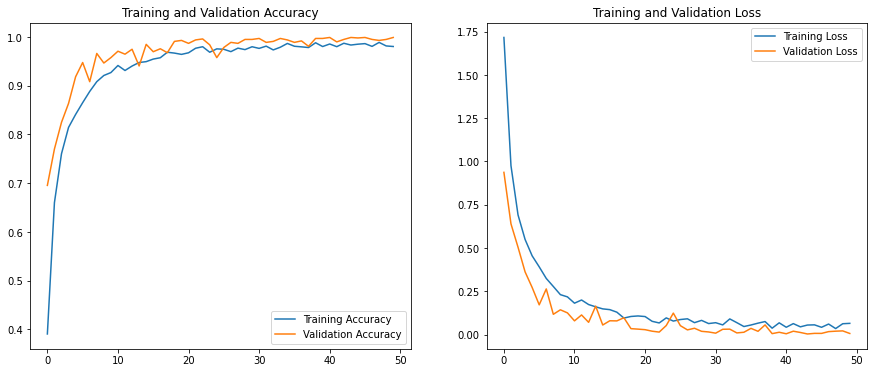

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Leaf_Mold
predicted label: Leaf_Mold


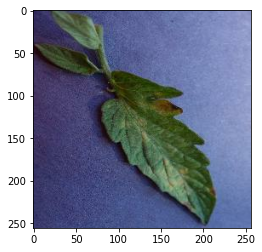

In [ ]:
import numpy as np
for images_batch, labels_batch in test_data.take(1):
    
    first_image = images_batch[15].numpy().astype('uint8')
    first_label = labels_batch[15].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[15])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

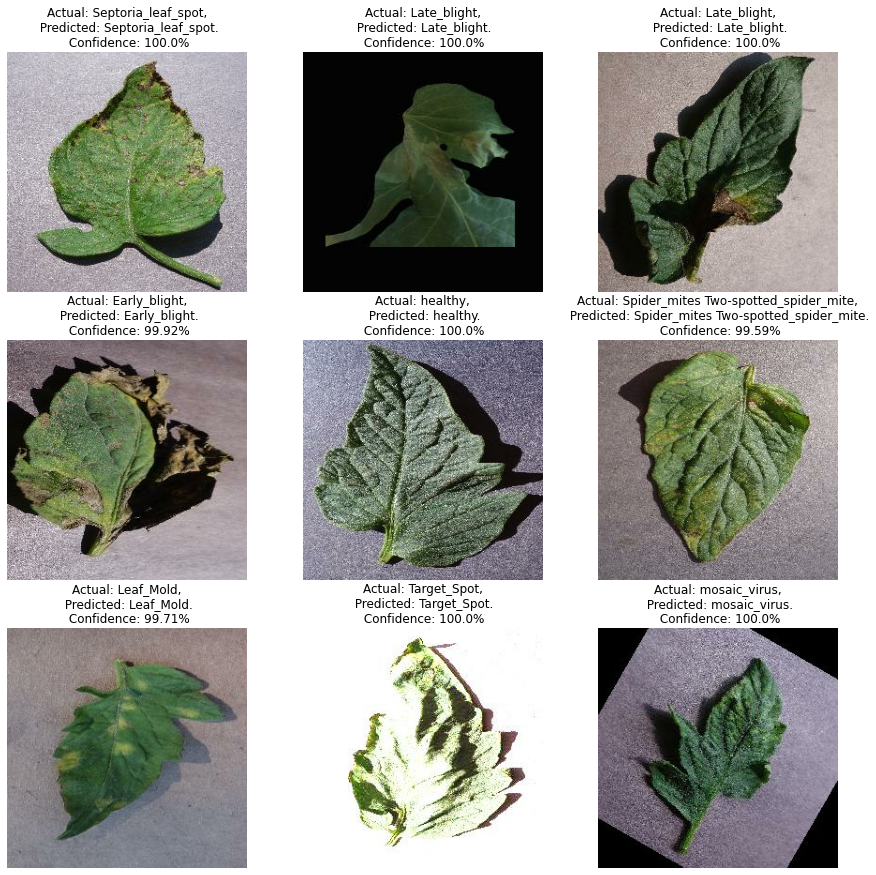

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
# import os
# model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
# model.save(f"../models/{model_version}")

In [ ]:
model.save("Model_Final.h5")